<h2>Steel plate problem with random position and radius</h2>

\begin{align*}
    \frac{E(x, \omega_1)}{2 (1 + \nu)} \cdot \nabla^2 u(x, \omega) + \frac{E(x, \omega_1)}{2 (1 - \nu)} \cdot \nabla(\nabla \cdot u(x, \omega)) + b = 0 \hspace{1cm} & | \: x \in D(\omega_2) \\
    u(x, \omega) = 0 \hspace{1cm} & | \: x \in \Gamma_1 \\
    \sigma(u, x) \cdot n(x) = g \hspace{1cm} & | \: x \in \Gamma_2
\end{align*}

with random position and radius perturbation function like this:

<img src="../../images/6_steel_plate_problem/perturbed_mesh_sample.png">

In [1]:
from helpers import *

In [ ]:
# Calculate random field E
mesh_resolution = 16
randomFieldE = calculate_randomFieldE(mesh_resolution=mesh_resolution)

In [3]:
# Time Analysis
mesh_resolutions = [8, 10, 12, 14, 16, 18, 20]
times = []
for mesh_resolution in mesh_resolutions:
    start = time.time()
    omega1 = sample_omega1(randomFieldE)
    omega2 = sample_omega2()
    q = sample_q()
    u_hat_sol_data = solve_model(mesh_resolution, omega1, omega2, q, randomFieldE=randomFieldE)
    end = time.time()
    times.append(end - start)
# Clear console output
clear_output(wait=True)
for mesh_resolution, time_ in zip(mesh_resolutions, times):
    print(f"Mesh Resolution: {mesh_resolution}, Time: {time_:.2f} s")

Mesh Resolution: 8, Time: 7.58 s
Mesh Resolution: 10, Time: 12.47 s
Mesh Resolution: 12, Time: 16.85 s
Mesh Resolution: 14, Time: 23.94 s
Mesh Resolution: 16, Time: 30.50 s
Mesh Resolution: 18, Time: 37.42 s
Mesh Resolution: 20, Time: 43.94 s


Number of nodes: 333


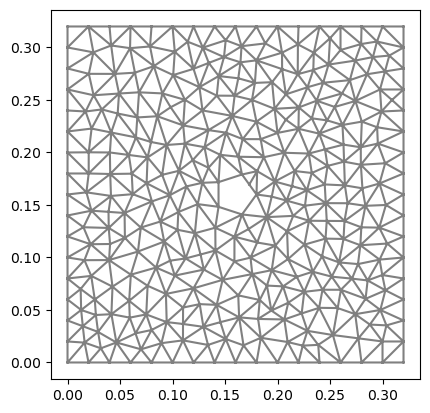

In [4]:
# Visualisation of the mesh and the number of nodes
mesh = create_reference_mesh(mesh_resolution = 14)
# Number of nodes
print(f"Number of nodes: {mesh.num_vertices()}")
fe.plot(mesh)
plt.show()

fine_u_hat_sols.shape: (20000, 1084)
mc_sample_sizes: [32, 64, 128, 256, 512, 1024, 2048, 4096, 8192]


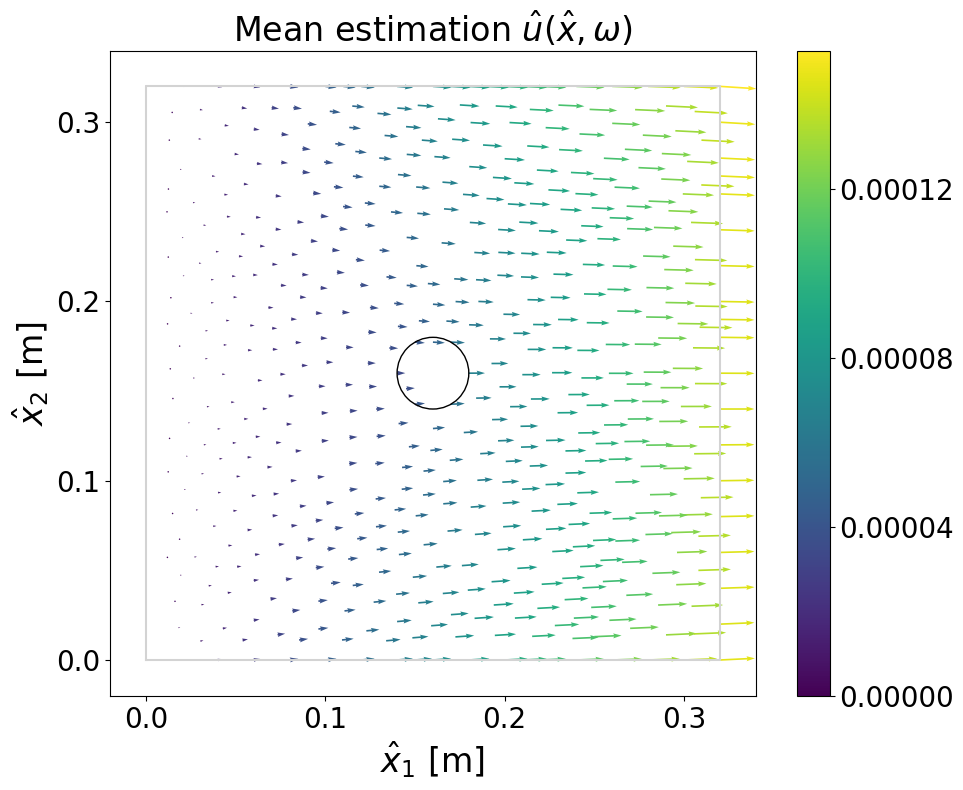

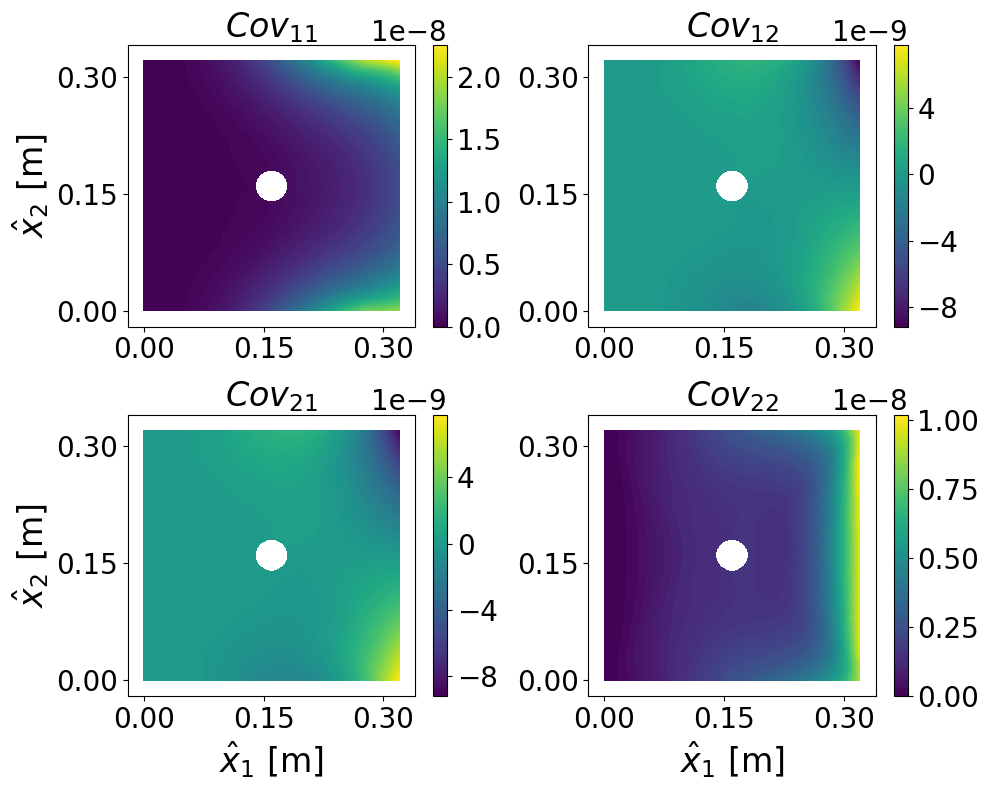

*** Warning: Degree of exact solution may be inadequate for accurate result in errornorm.
*** Warning: Degree of exact solution may be inadequate for accurate result in errornorm.
*** Warning: Degree of exact solution may be inadequate for accurate result in errornorm.
*** Warning: Degree of exact solution may be inadequate for accurate result in errornorm.
*** Warning: Degree of exact solution may be inadequate for accurate result in errornorm.
*** Warning: Degree of exact solution may be inadequate for accurate result in errornorm.
*** Warning: Degree of exact solution may be inadequate for accurate result in errornorm.
*** Warning: Degree of exact solution may be inadequate for accurate result in errornorm.
*** Warning: Degree of exact solution may be inadequate for accurate result in errornorm.
*** Warning: Degree of exact solution may be inadequate for accurate result in errornorm.
*** Warning: Degree of exact solution may be inadequate for accurate result in errornorm.
*** Warnin

/Users/elias/git/Masterthesis/steel_plate_problem/model_random_position_and_radius/helpers.py:1083: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax1.plot(mc_sample_sizes, L2_errors, 'bo', marker='x', label=r'$L^2$ Error')
/Users/elias/git/Masterthesis/steel_plate_problem/model_random_position_and_radius/helpers.py:1091: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax2.plot(mc_sample_sizes, H1_errors, 'bo', marker='x', label=r'$H^1$ Error')


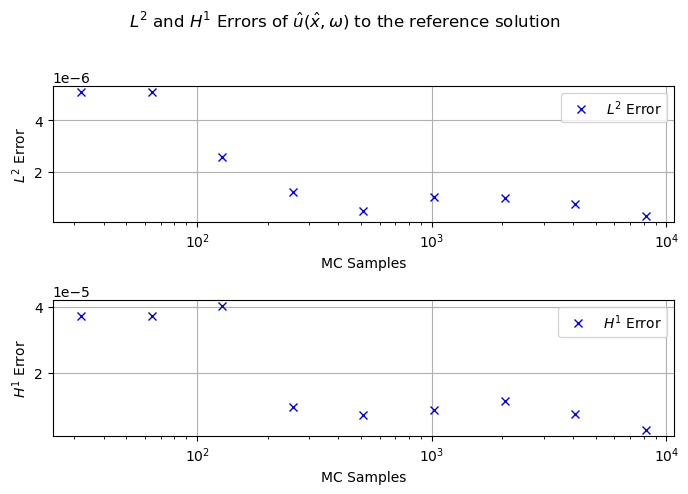

In [2]:
"""Monte Carlo Analysis û
Creation of image: images/6_steel_plate_problem/mc_u_hat_mean.png
Creation of image: images/6_steel_plate_problem/mc_u_hat_var.png
Creation of image: images/6_steel_plate_problem/mc_u_hat_errors.png"""

mc_analysis_u_hat(mesh_resolution_kl_e=18,
            mesh_resolution=18)

fine_sigma_hat_proj.shape: (20000, 2168)
mc_sample_sizes: [32, 64, 128, 256, 512, 1024, 2048, 4096, 8192]
Object cannot be plotted directly, projecting to piecewise linears.


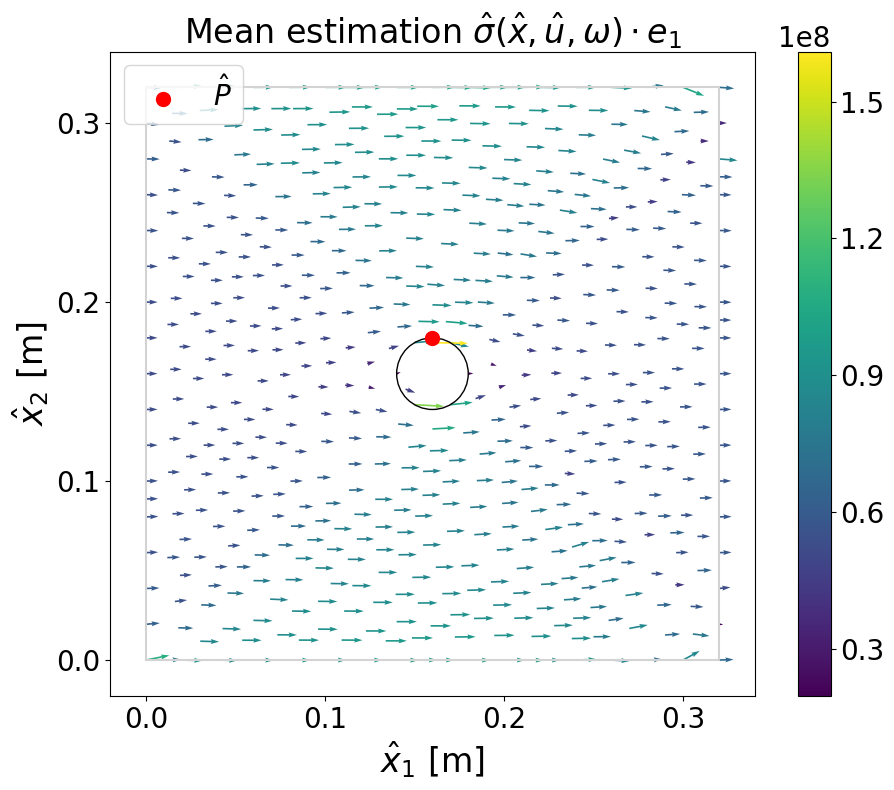

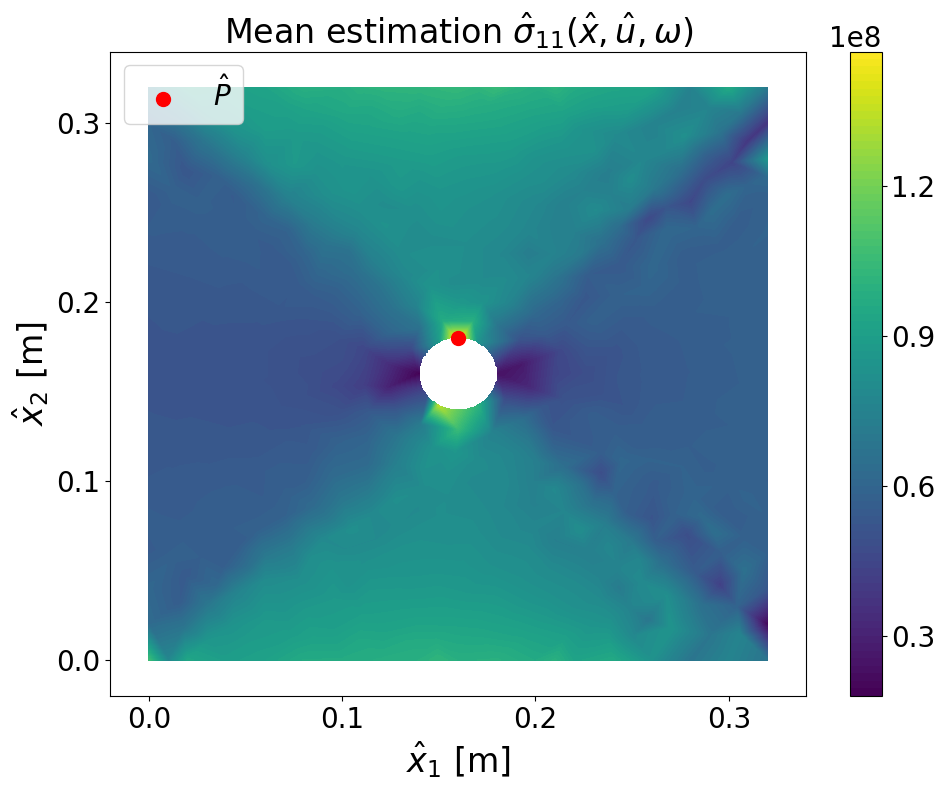

/Users/elias/git/Masterthesis/steel_plate_problem/model_random_position_and_radius/helpers.py:1256: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(mc_sample_sizes, np.abs(sparse_sigma_hat_proj_P_hat_means - fine_mean_sigma_hat_proj(P_hat)[0]), 'bo', marker='x', linestyle='None', label='Absolute Error', markersize=10)


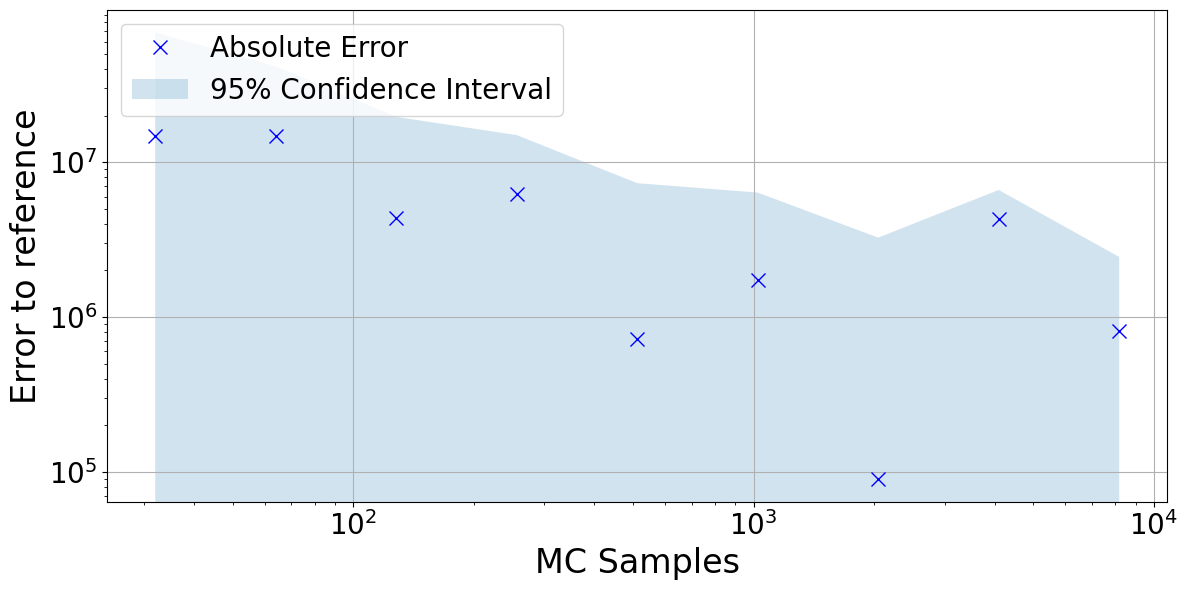

In [6]:
"""Monte Carlo Analysis sigma_hat
Creation of image: images/6_steel_plate_problem/mc_sigma_hat_mean_vectorized.png
Creation of image: images/6_steel_plate_problem/mc_sigma_hat_first_component.png
Creation of image: images/6_steel_plate_problem/mc_sigma_hat_convergence.png"""

mc_analysis_sigma_hat(mesh_resolution_kl_e=18,
            mesh_resolution=18,
            P_hat=fe.Point(0.16, 0.18))

/Users/elias/git/Masterthesis/steel_plate_problem/model_random_position_and_radius/helpers.py:1358: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x_labels, fontsize=24)


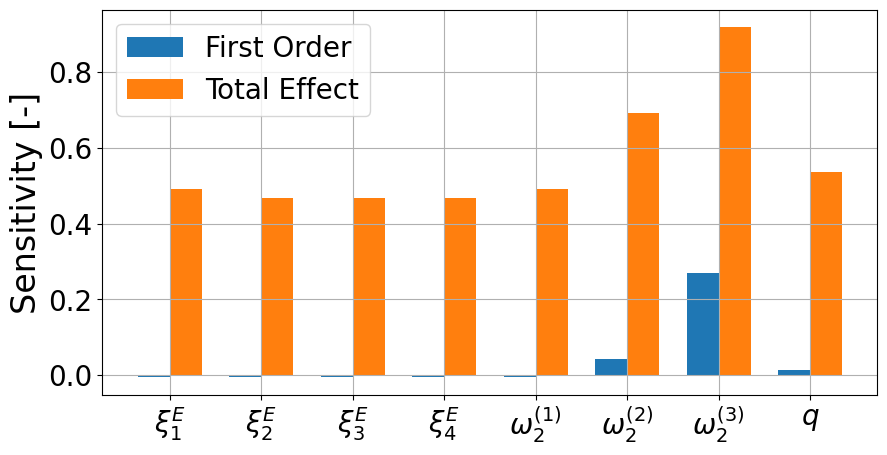

Sample size: 12000


In [7]:
"""Sobol Analysis of û
Creation of image: images/6_steel_plate_problem/sp_5_sobol_u_hat.png"""

S_single, S_total, mc_sample_size = sp_5_sobol_calc_indices_u_hat(fem_res=14, kl_res_e=14, size_of_xi_e=4)
sp_5_plot_sobols(S_single=S_single, S_total=S_total, mc_sample_size=mc_sample_size, size_of_xi_e=4)

/Users/elias/git/Masterthesis/steel_plate_problem/model_random_position_and_radius/helpers.py:1358: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x_labels, fontsize=24)


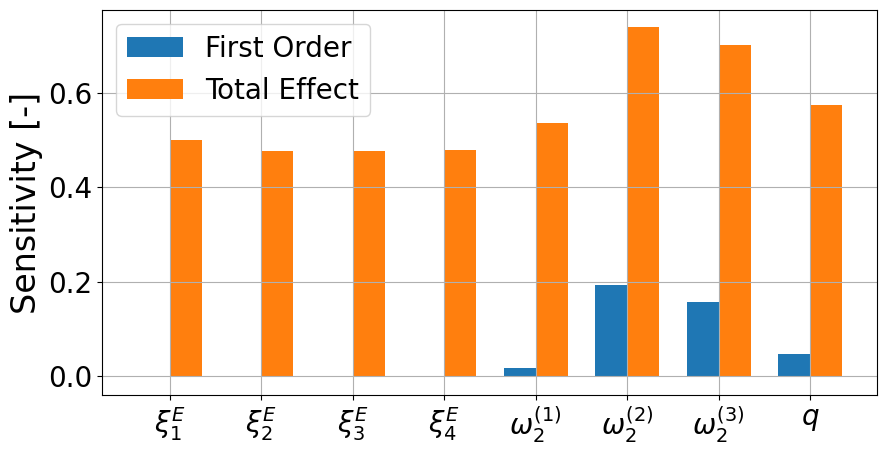

Sample size: 12000


In [8]:
"""Sobol Analysis of sigma_hat
Creation of image: images/6_steel_plate_problem/sp_5_sobol_sigma_hat.png"""

S_single, S_total, mc_sample_size = sp_5_sobol_calc_indices_sigma_hat(fem_res=14, kl_res_e=14, size_of_xi_e=4)
sp_5_plot_sobols(S_single=S_single, S_total=S_total, mc_sample_size=mc_sample_size, size_of_xi_e=4)

In [9]:
# Print eigenvalues of random field E for interpreting sobol results
randomFieldE = calculate_randomFieldE(14)
for i in range(4):
    print(f"Eigenvalue {i+1}: {randomFieldE.eigenvalues[i]}")

Eigenvalue 1: 5.0071732958242076e-05
Eigenvalue 2: 4.509846264037929e-05
Eigenvalue 3: 4.5078367703677556e-05
Eigenvalue 4: 4.0093360034619526e-05


Solving linear variational problem.
  Building point search tree to accelerate distance queries.
  Computed bounding box tree with 1579 nodes for 790 points.
Building point search tree to accelerate distance queries.
Computed bounding box tree with 1579 nodes for 790 points.
Object cannot be plotted directly, projecting to piecewise linears.


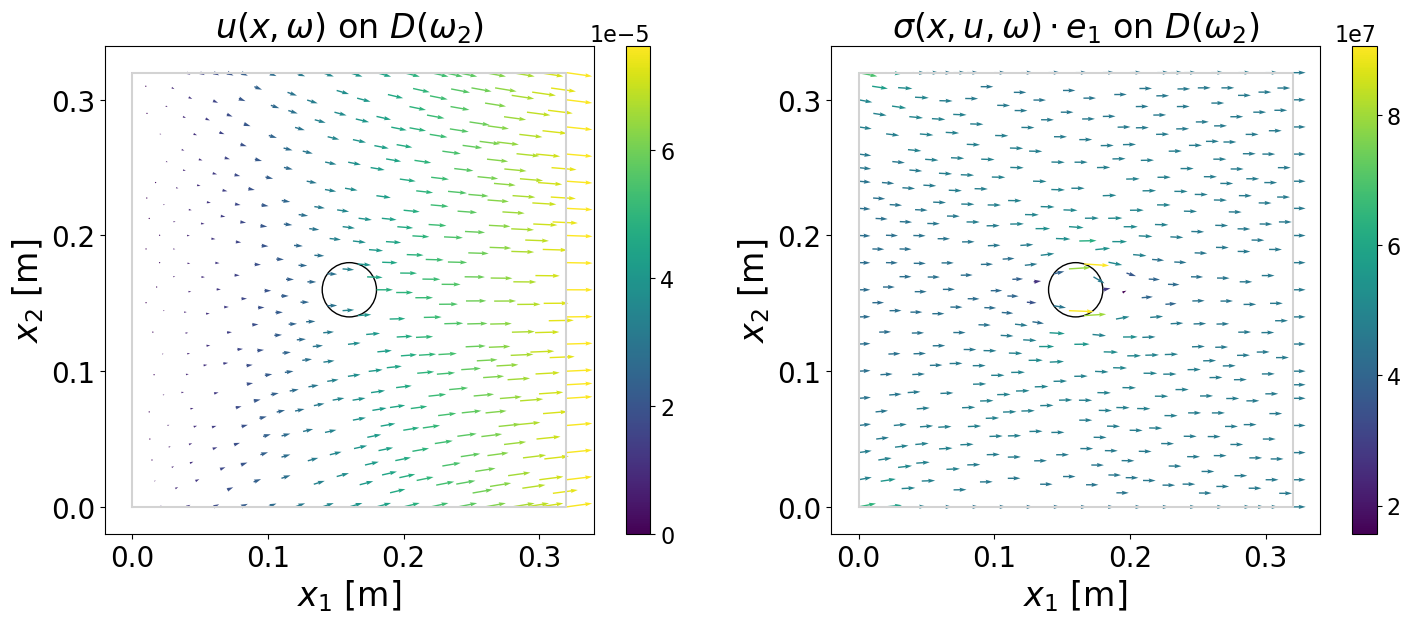

In [10]:
"""Plot of solution sample without perturbation
Creation of image: images/6_steel_plate_problem/solution_sample_without_perturbation.png"""

plot_solution_sample_without_perturbation()

Solving linear variational problem.
  Building point search tree to accelerate distance queries.
  Computed bounding box tree with 1579 nodes for 790 points.
  Building point search tree to accelerate distance queries.
  Computed bounding box tree with 1579 nodes for 790 points.
Object cannot be plotted directly, projecting to piecewise linears.
Object cannot be plotted directly, projecting to piecewise linears.


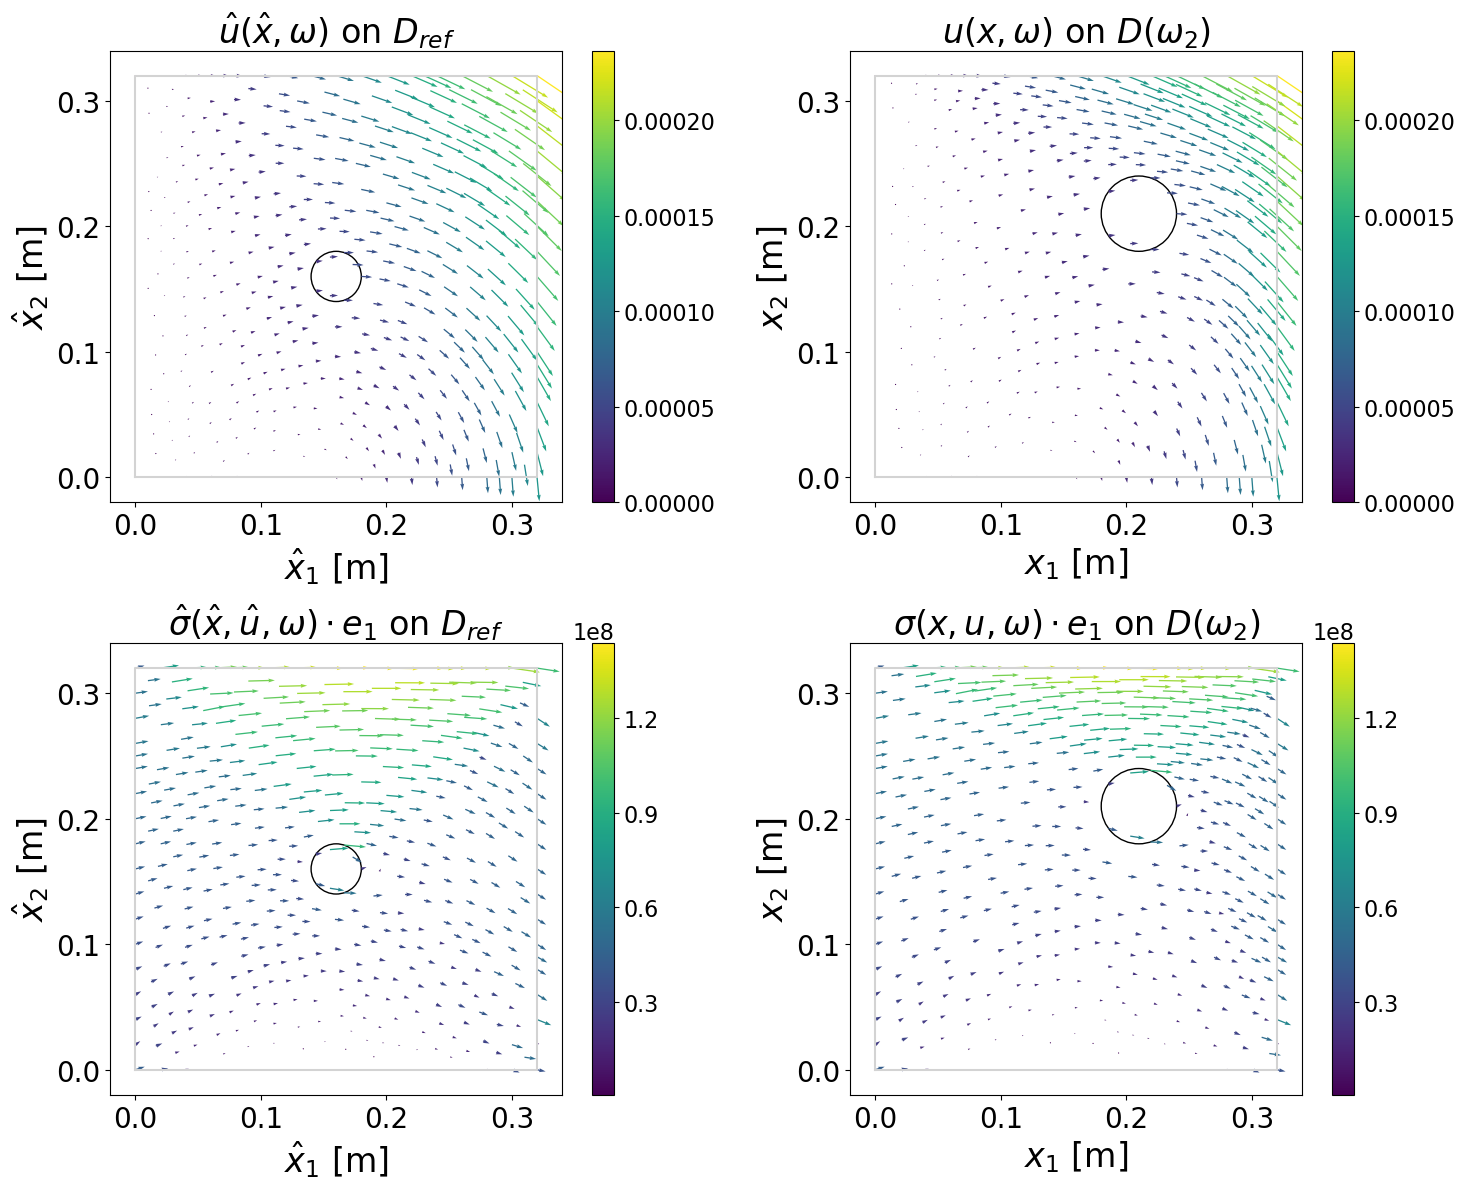

In [11]:
""" Plot of solution sample with perturbation
Creation of image: images/6_steel_plate_problem/solution_sample_with_perturbation.png"""

plot_solution_sample_with_perturbation()

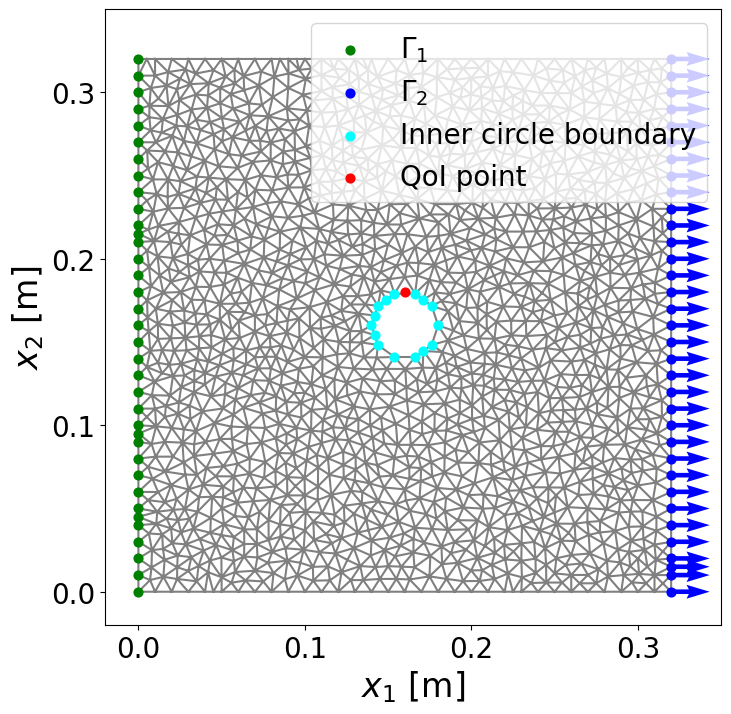

In [12]:
"""Plot reference domain with coloured boundary points.
Creation of image: images/6_steel_plate_problem/reference_domain.png"""

plot_reference_domain()

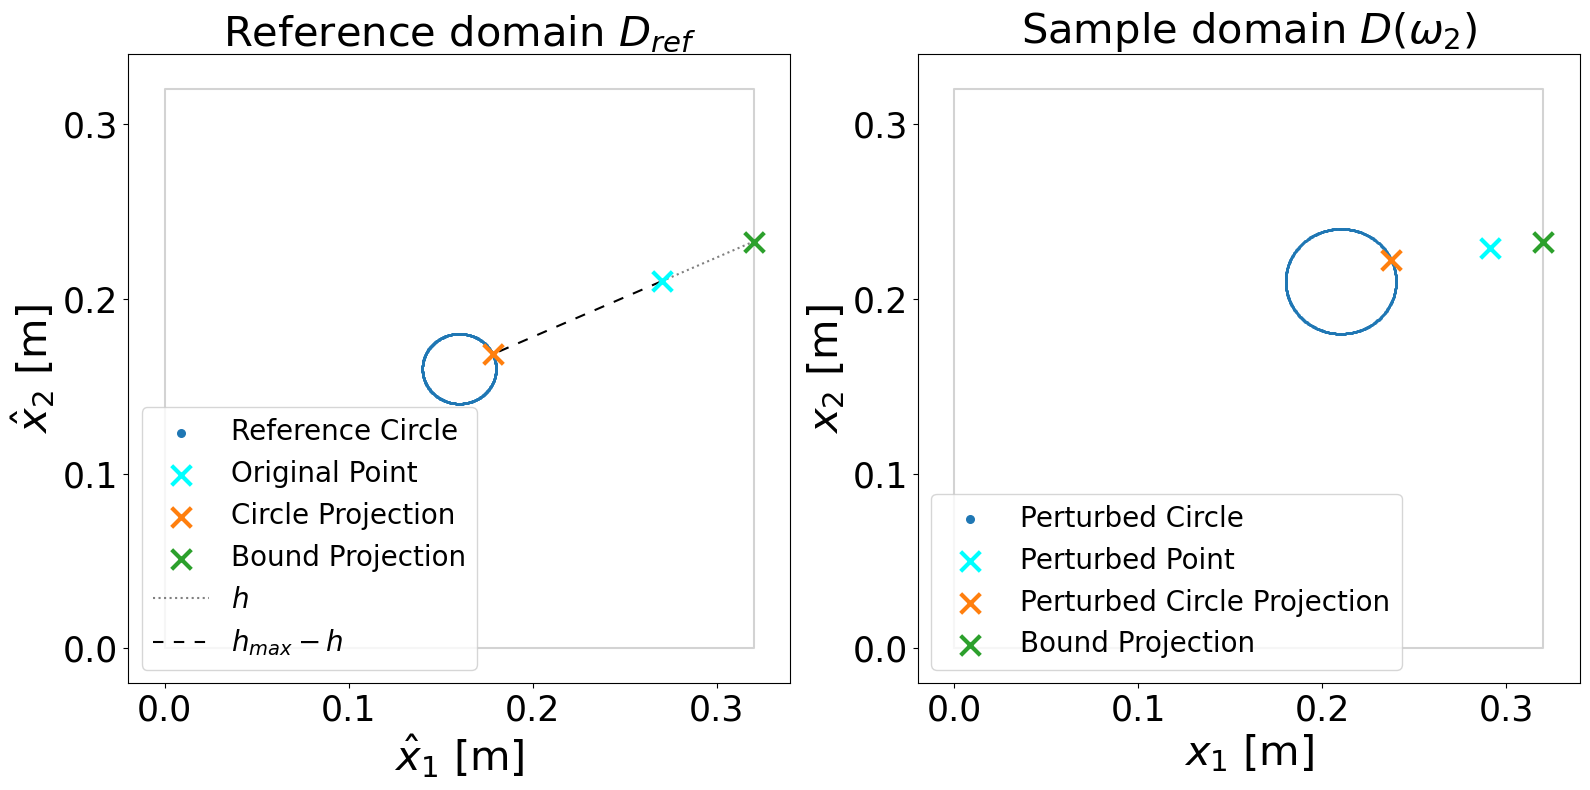

In [13]:
"""Plot perturbation function with projected points.
Creation of image: images/6_steel_plate_problem/perturbation_function.png"""

plot_perturbation_function()

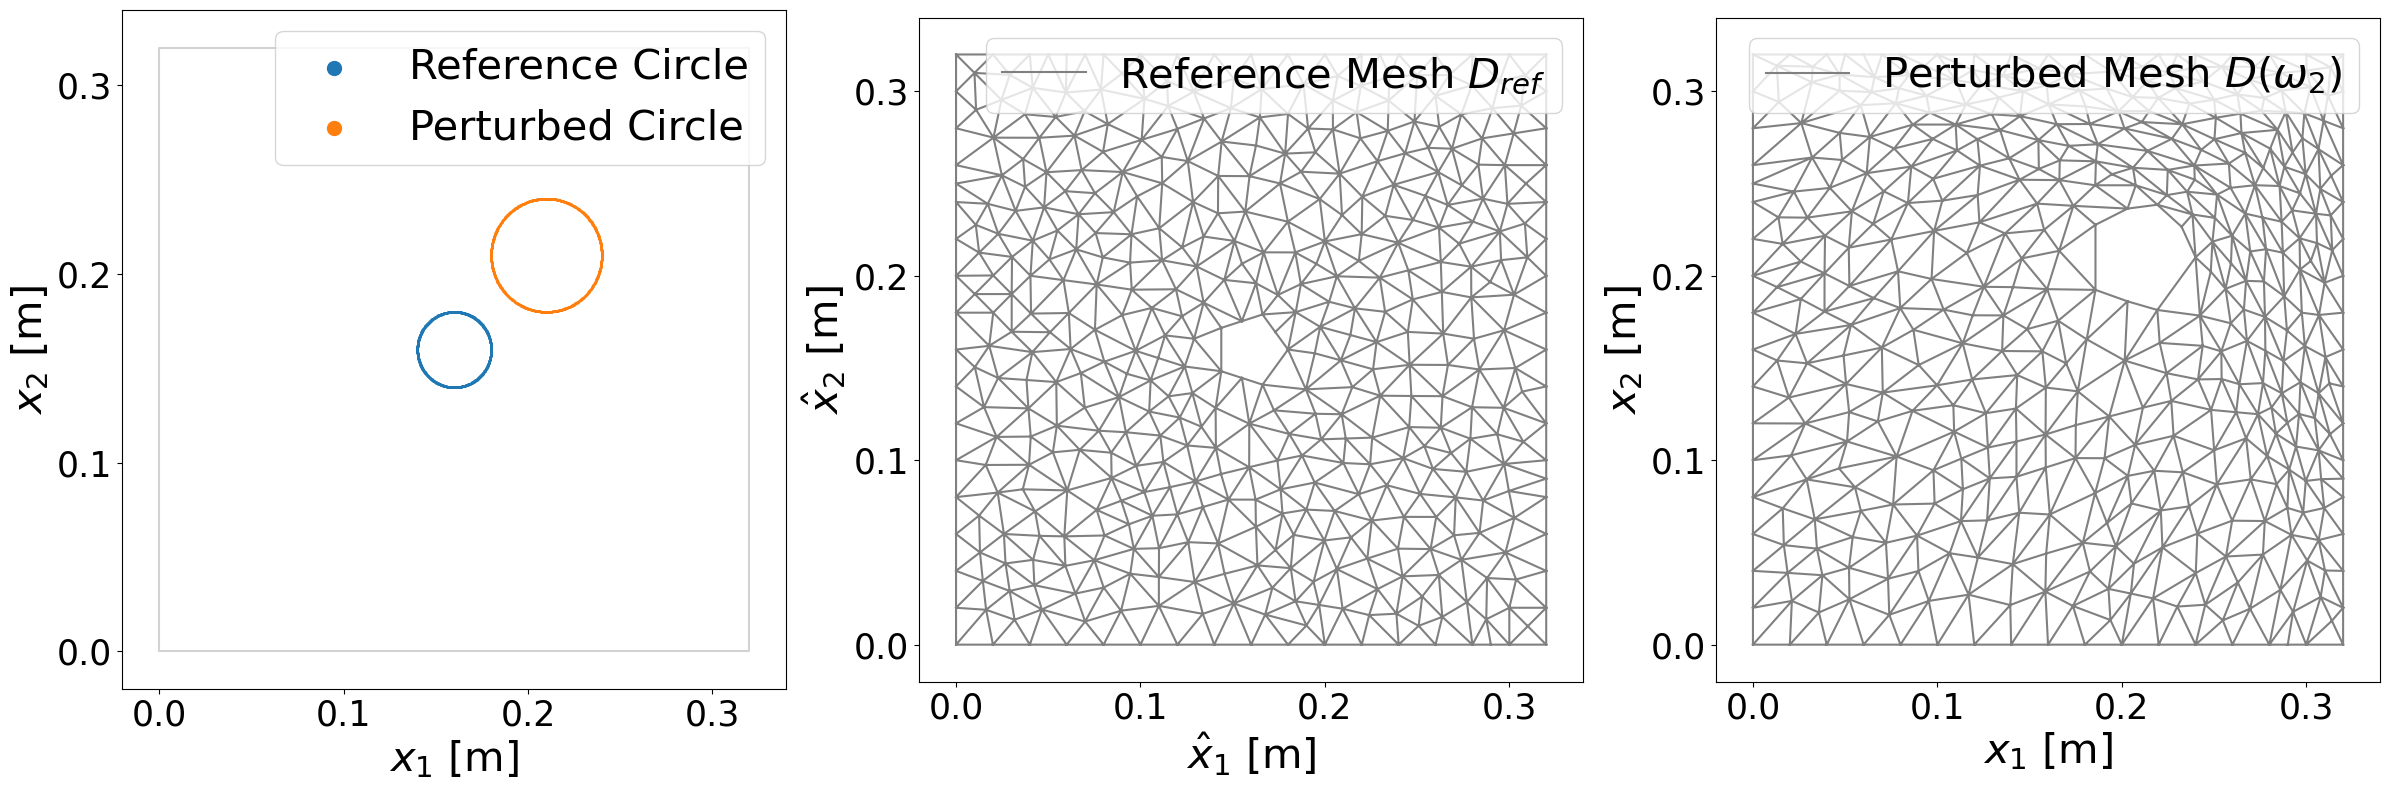

In [14]:
"""Plot perturbed mesh sample.
Creation of image: images/6_steel_plate_problem/perturbed_mesh_sample.png"""

plot_perturbed_mesh_sample()

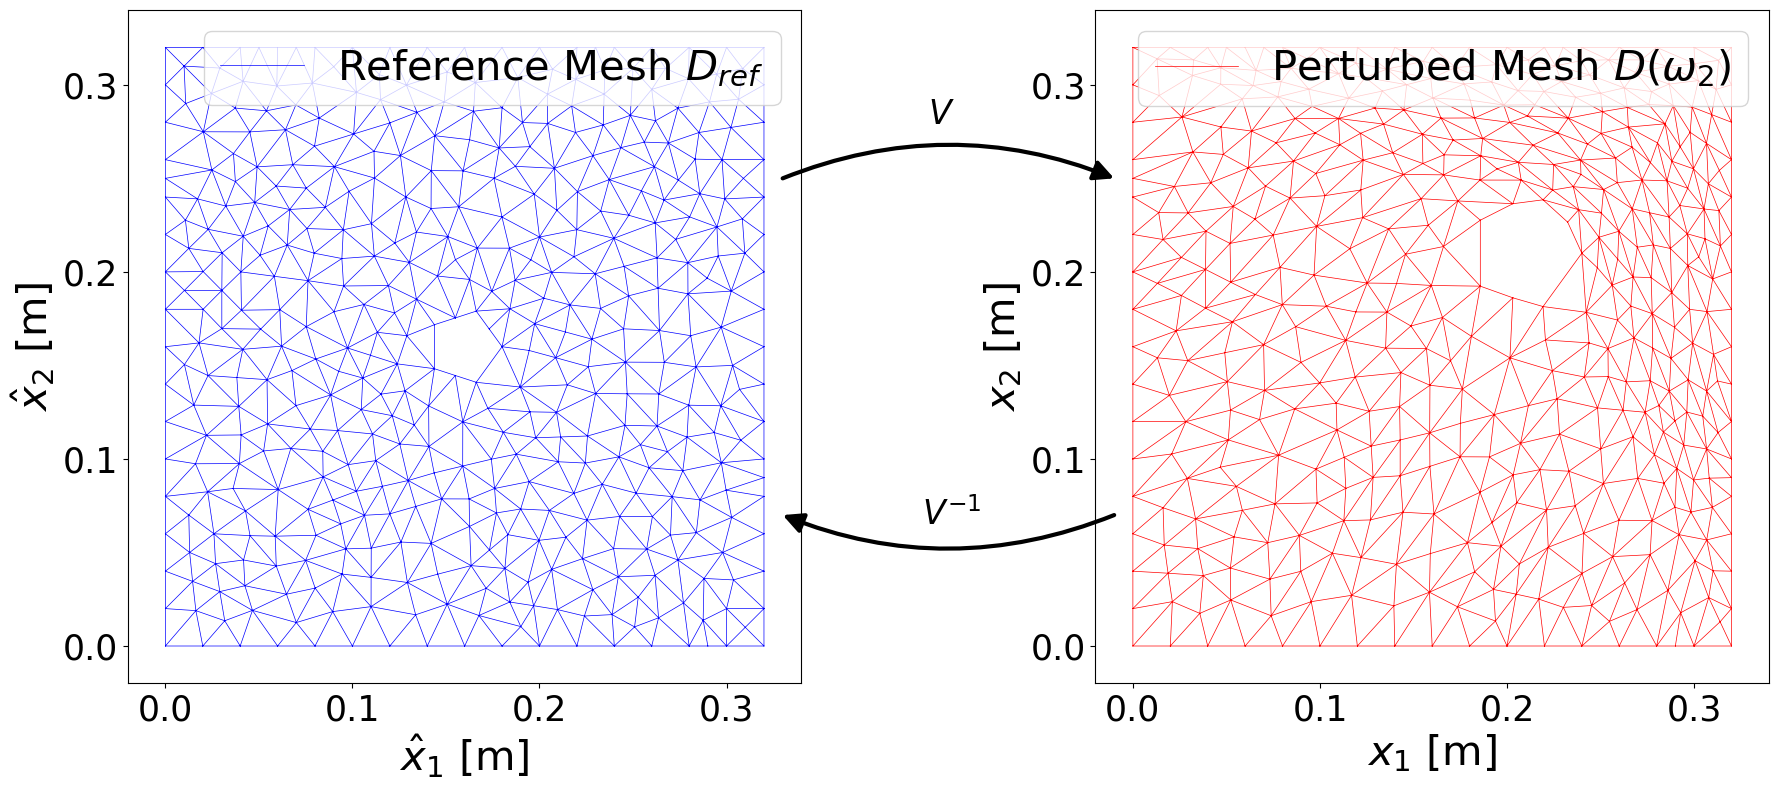

In [15]:
"""Plot the grid perturbation for the introduction.
Creation of image: images/1_introduction/steel_plate_grid_perturbation.png"""

plot_grid_perturbation_for_introduction()

Building point search tree to accelerate distance queries.
Computed bounding box tree with 1579 nodes for 790 points.


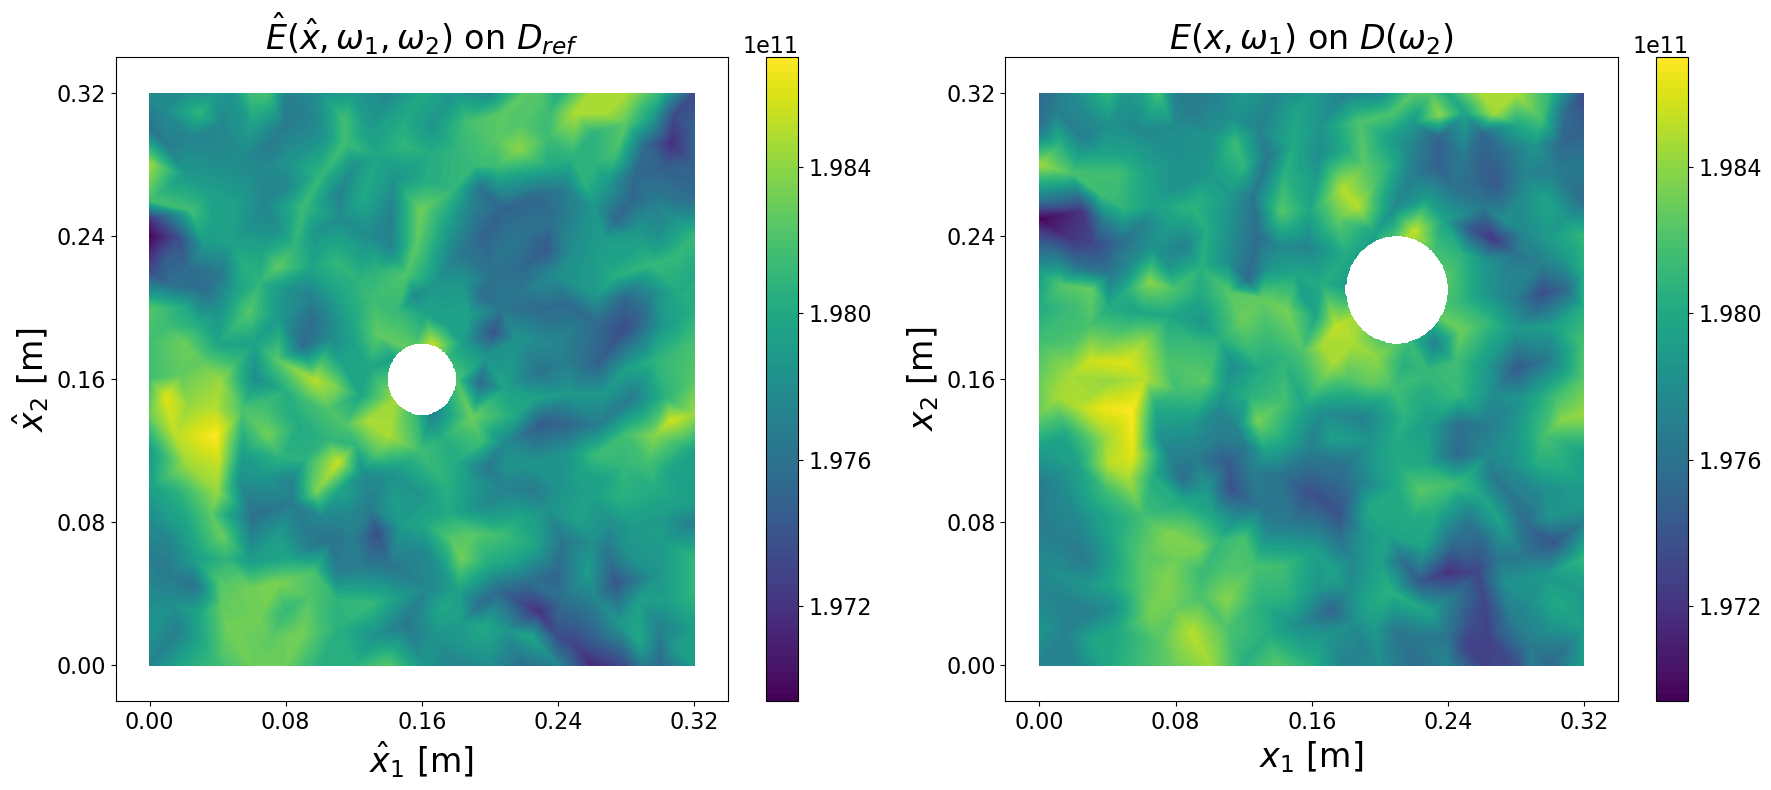

In [16]:
"""Plot random field Ê and E.
Creation of image: images/6_steel_plate_problem/random_field_E.png"""

plot_random_field_e()